In [9]:
#coding:utf-8__author__ = 'Hanxiaoyang'
import jieba    #分词包
import numpy    #numpy计算包
import codecs   #codecs提供的open方法来指定打开的文件的语言编码，它会在读取的时候自动转换为内部unicode 
import pandas   #数据分析包
import matplotlib.pyplot as plt 
from wordcloud import WordCloud#词云包

In [10]:
#file=codecs.open(u"heart.txt",'r')
#content=file.read()
#file.close()
#print(content)
segment=[]
segs = ['Honey','Honey','Honey','Honey','Paris','Paris','Paris','Paris',
           'I love you','I love you','I love you','I love you', 
           'Morning', 'My love','My love', 'My love', 'My love', 'My love', 'Miss you','Miss you','Miss you','Miss you',
           'Zurich','Zurich','Zurich', 
             'Call me', 'Call me',"Happy Valentine's day","Happy Valentine's day",
            'Good night' , 'My love']
#segs=jieba.cut(content) #切词，“么么哒”才能出现
for seg in segs:
    print(seg)
    segment.append(seg)

Honey
Honey
Honey
Honey
Paris
Paris
Paris
Paris
I love you
I love you
I love you
I love you
Morning
My love
My love
My love
My love
My love
Miss you
Miss you
Miss you
Miss you
Zurich
Zurich
Zurich
Call me
Call me
Happy Valentine's day
Happy Valentine's day
Good night
My love


In [11]:
words_df=pandas.DataFrame({'segment':segment})
words_df.head()
#stopwords=pandas.read_csv("stopwords.txt",index_col=False,quoting=3,sep="\t",
#                          names=['stopword'],encoding="utf8")
#words_df=words_df[~words_df.segment.isin(stopwords.stopword)]

,segment
0,Honey
1,Honey
2,Honey
3,Honey
4,Paris


In [12]:
words_stat=words_df.groupby(by=['segment'])['segment'].agg({"计数":numpy.size})
words_stat=words_stat.reset_index().sort(columns="计数",ascending=False)
print(words_stat)  #打印统计结果
from ipykernel import kernelapp as app

                 segment  计数
7                My love   6
3                  Honey   4
4             I love you   4
5               Miss you   4
8                  Paris   4
9                 Zurich   3
0                Call me   2
2  Happy Valentine's day   2
1             Good night   1
6                Morning   1


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


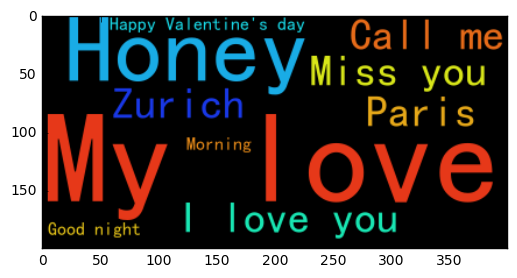

In [13]:
%matplotlib inline
wordcloud=WordCloud(font_path="simhei.ttf",background_color="black")
wordcloud=wordcloud.fit_words(words_stat.head(1000).itertuples(index=False))
plt.imshow(wordcloud)
plt.show()

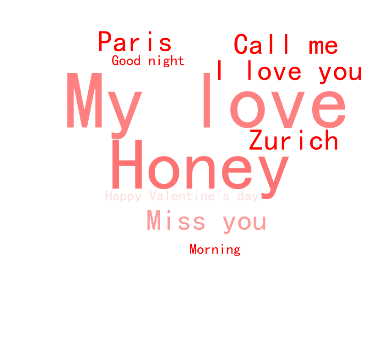

In [14]:
from scipy.misc import imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator
%matplotlib inline
bimg=imread('heart.jpeg')
wordcloud=WordCloud(background_color="white",mask=bimg,font_path='simhei.ttf')
wordcloud=wordcloud.fit_words(words_stat.head(4000).itertuples(index=False))
bimgColors=ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))
plt.show()

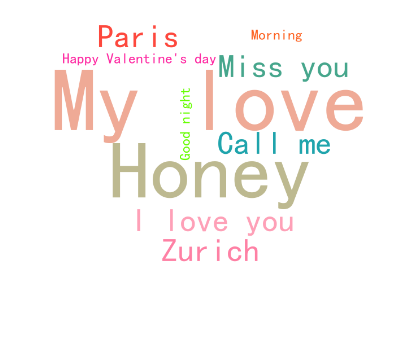

In [16]:
from scipy.misc import imread
import matplotlib.pyplot as plt
from wordcloud import WordCloud,ImageColorGenerator
%matplotlib inline
bimg=imread('colorful_heart.jpg')
wordcloud=WordCloud(background_color="white",mask=bimg,font_path='simhei.ttf')
wordcloud=wordcloud.fit_words(words_stat.head(4000).itertuples(index=False))
bimgColors=ImageColorGenerator(bimg)
plt.axis("off")
plt.imshow(wordcloud.recolor(color_func=bimgColors))
plt.show()